# Gaze estimation using Neural Networks
## Data preparation
This exercise focuses on using a multilayer perceptron (MLP) to estimate gaze using data from week 6 Filtering gaze data
.
In exercise Filtering gaze data
 a dictionary was generated dividing the frames into sections, one for each gaze target. 
<article class="message task"><a class="anchor" id="preparedata"></a>
    <div class="message-header">
        <span>Task 1: Load the data 1</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to load a dictionary containing the frame intervals for each target.



</div></article>



In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import nn_util
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import time

frames = nn_util.load_frames("data/frames.csv")

Dictionary loaded from data/frames.csv


<article class="message task"><a class="anchor" id="preparedata1"></a>
    <div class="message-header">
        <span>Task 2: Load the data 2</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to load the cleaned pupil coordinates in the file `cleaned_pupil_coordinates.csv`
 and screen coordinates in the file `screen_coordinates.csv`
 for the `grid`
 pattern. You may have to change the filepath. The function `map_coordinates_to_targets`
 returns two $N \times 2$ arrays containing inputs and labels. 



</div></article>



In [3]:
file_name_pupil = './data/cleaned_pupil_coordinates.csv'
file_name_screen = './data/cleaned_screen_coordinates.csv'
pupil_coor = np.asarray(nn_util.load_coordinates(file_name_pupil))
screen_coor = np.asarray(nn_util.load_coordinates(file_name_screen))
input, labels = nn_util.map_coordinates_to_targets(pupil_coor, frames, screen_coor)

The data set is divided into training and test data using train_test_split
 function from scikit-learn.
<article class="message task"><a class="anchor" id="preparedata2"></a>
    <div class="message-header">
        <span>Task 3: Prepare data</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


In the cell below:
1. Use the function `train_test_split`
 to split the input and target data into a $80\%/20\%$ train/test sets.
2. Use the function `train_test_split`
 to split the training into a $75\%/25\%$ train/validation sets.
3. Visualize the data using the function `plot_data_splits`
 from the `nn_util.py`
 file.



</div></article>



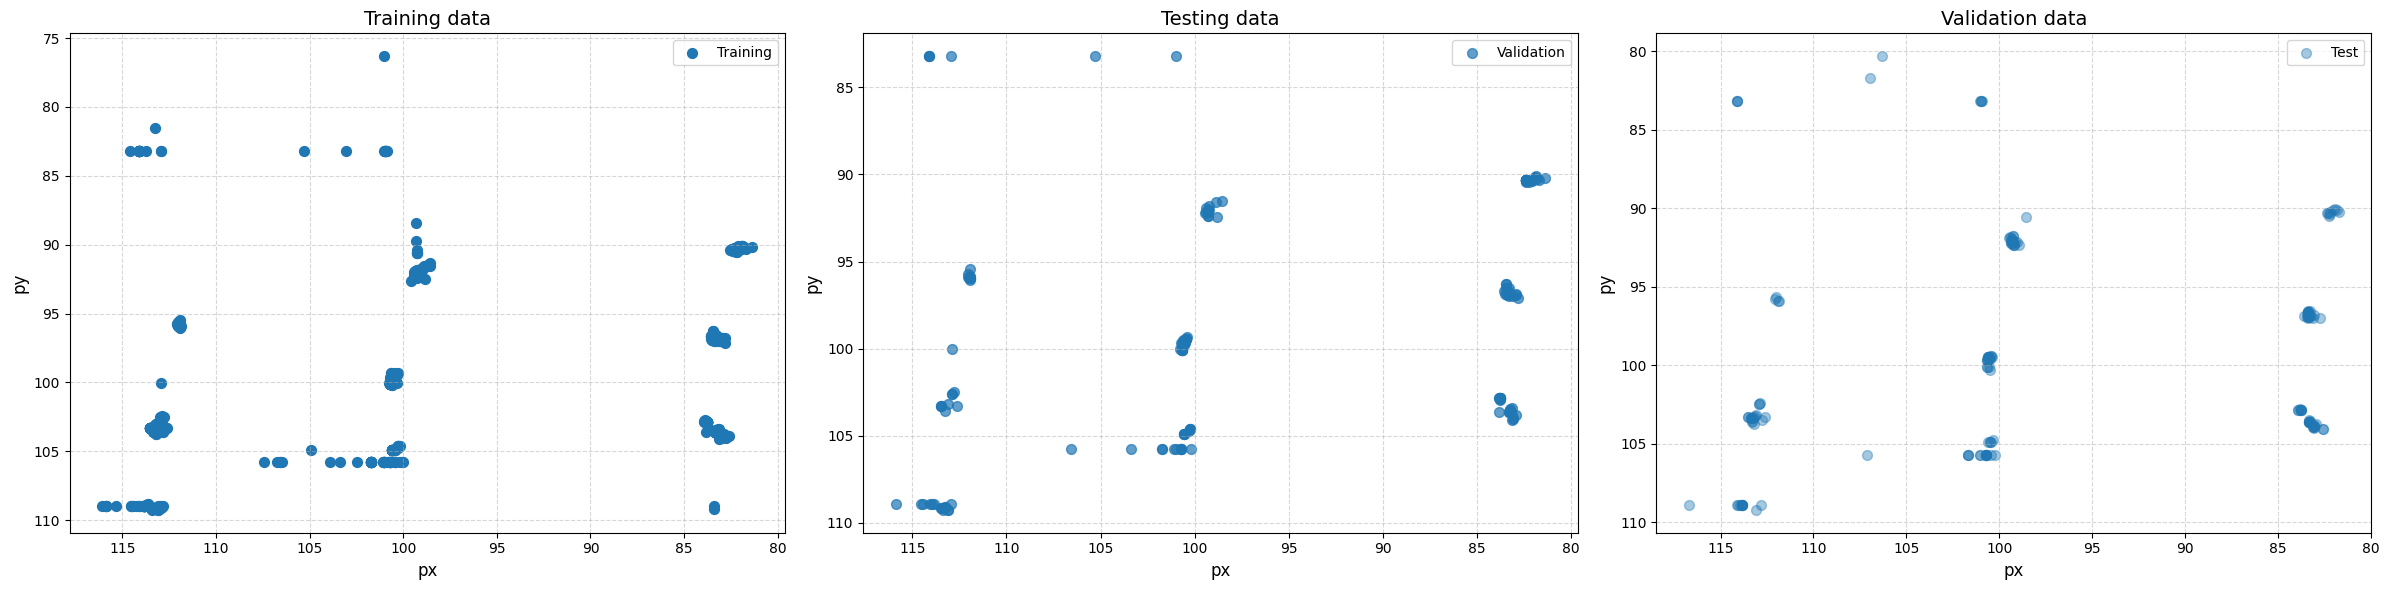

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(input, labels, test_size=0.2, random_state=42)
X_train_val, X_val, y_train_val, Y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

nn_util.plot_data_splits(X_train, X_val, X_test) # uncomment once the splits are made

<article class="message task"><a class="anchor" id="preparedata3"></a>
    <div class="message-header">
        <span>Task 4: Reflection on data split</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Reflect on the benefits of making these splits and identify potential pitfals?



</div></article>



In [0]:
# Task 4 Reflection: Data Splits
# 1. Splitting data into training, validation, and testing ensures the model generalizes well to unseen data.
# 2. Training data is used to learn patterns, validation data helps tune hyperparameters, and testing evaluates performance.
# 3. Splits prevent overfitting by avoiding evaluation on the same data used for training.
# 4. Validation data aids in selecting the best model by comparing its performance across different configurations.
# 5. A potential pitfall is that small validation/test sets may not represent the overall dataset distribution.
# 6. Random splitting can lead to data leakage if correlated samples exist, skewing results.
# 7. Ensuring proper randomization and stratification (if required) mitigates distribution-related issues.
# 8. Visualization confirms the splits appear representative, but edge cases in data may still challenge generalization.

## Linear Model
The following tasks introduces an affine neural network but uses non-linear optimization to find the model parameters.
<article class="message task"><a class="anchor" id="preparedata4"></a>
    <div class="message-header">
        <span>Task 5: Linear Least Square</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


In Assignment 1 Gaze Estimation
 you used the Linear Least Square for finding the model parameters.
1. Run the cell below to learn the model parameters using Linear Least Squares on the entire gaze data training set and visualize the result.



</div></article>



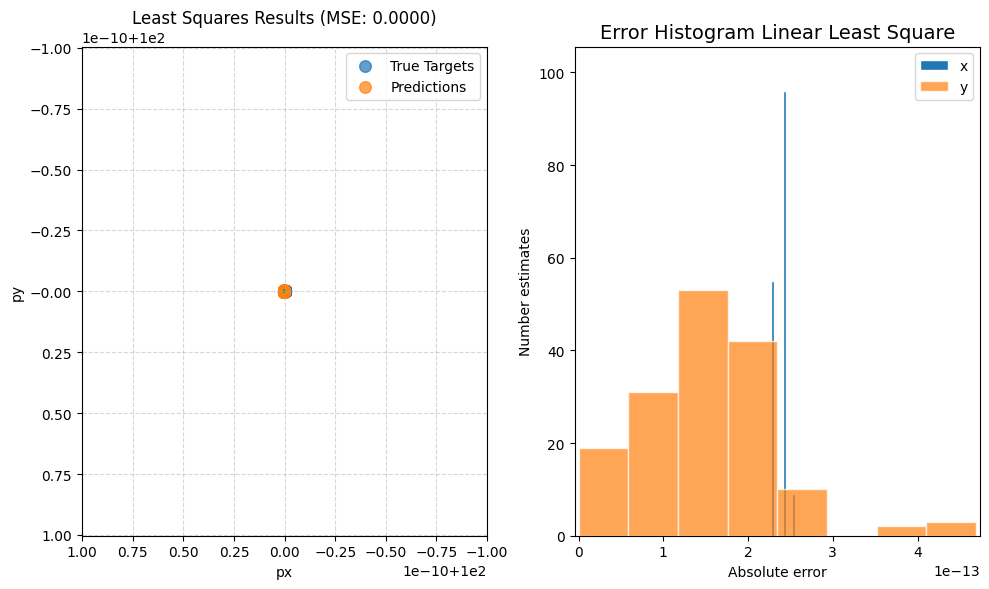

In [13]:
nn_util.plot_least_square_results(X_train, Y_train, X_test, Y_test)

The cell below contains the definition of an affine model in Pytorch.
<article class="message task"><a class="anchor" id="preparedata5"></a>
    <div class="message-header">
        <span>Task 6: Train a linear model (gaze data)</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. On a piece of paper draw the architecture of the network given the class definition `LinearModel`
.
**Note:** The class `MSELoss`
 explicitly defines the _Mean Squared Error_ loss function, for pedagogical reasons. Note, the Pytorch library has its own mse loss
.


2. Run the cell below to train the network.



</div></article>



Average MSE: 45.31710433959961


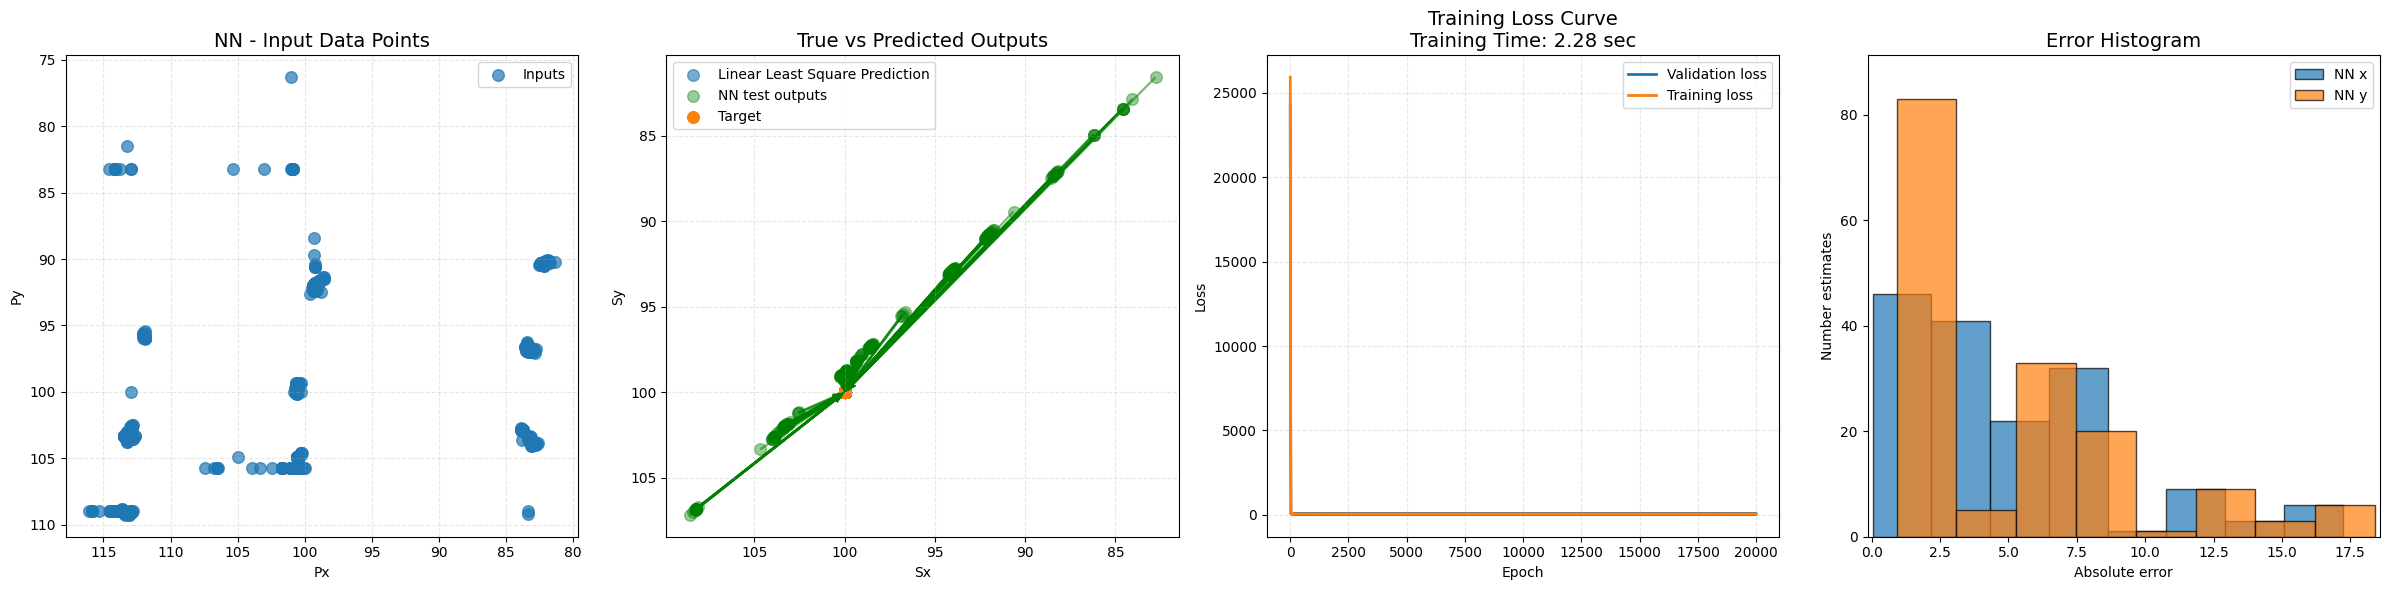

In [14]:
class LinearModel(nn.Module):
    """
    Args:
        input_dim (int): Number of input features.
        output_dim (int): Number of output features.

    Methods:
        forward(x): Passes the input through the linear layer.
    """
    def __init__(self, input_dim, output_dim):
        super(LinearModel, self).__init__()
        self.linear1 = nn.Linear(input_dim, output_dim)
 
    def forward(self, x):
        """Args:
        x (Tensor): Input tensor.
        Returns:
            Tensor: Output tensor after applying the linear transformation.
        """
        x = self.linear1(x)
        return x
    
class MSELoss(nn.Module):
    def __init__(self, reduction='mean'):
        super(MSELoss, self).__init__()
        self.reduction = reduction

    def forward(self, input, target):
        squared_diff = (input - target) ** 2
        if self.reduction == 'mean':
            return squared_diff.mean()
        elif self.reduction == 'sum':
            return squared_diff.sum()
        else:
            raise ValueError("Invalid reduction type. Use 'mean' or 'sum'.")

    
def train_model(model, criterion, optimizer, X_train, Y_train, X_val=None, Y_val=None, num_epochs=100):
    """
    Args:
        model (nn.Module): The neural network model to train.
        criterion (nn.Module): The loss function to minimize.
        optimizer (torch.optim.Optimizer): Optimizer for updating model parameters.
        X_train (Nx2 Tensor): Training input data.
        Y_train (Nx2 Tensor): Training target data.
        X_val (Nx2 Tensor, optional): Validation input data. Defaults to None.
        Y_val (Nx2 Tensor, optional): Validation target data. Defaults to None.
        num_epochs (int): Number of training epochs.

    Returns:
        list: Loss values for each epoch (training).
        list: Loss values for each epoch (validation).
        float: Training time.
    """
    start_time = time.time()
    train_losses = []
    val_losses = []
    model_params = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()
        train_losses.append(loss.item())

        # Validation phase (if validation data is provided)
        if X_val is not None and Y_val is not None:
            with torch.no_grad():
                val_outputs = model(X_val)
                model_params.append(model.parameters())
                val_loss = criterion(val_outputs, Y_val)
                val_losses.append(val_loss.item())

    end_time = time.time()
    training_time = end_time - start_time

    return train_losses, val_losses, training_time



def test_model(model, X_test, Y_test):
    """
    Evaluates a trained model on test data.

    Args:
        model (nn.Module): The trained neural network model.
        X_test (Tensor): Test input data.
        Y_test (Tensor): Test target data.

    Returns:
        float: Mean squared error (MSE) over the test set.
        np.ndarray: Predicted values as a numpy array.
        np.ndarray: True values as a numpy array.
        np.ndarray: Absolute errors for x and y coordinates.
    """
    model.eval()
    with torch.no_grad():
        test_output = model(X_test)
        mse = mean_squared_error(Y_test.cpu().numpy(), test_output.cpu().numpy())
        predictions = test_output.cpu().numpy()
        true_values = Y_test.cpu().numpy()
        errors = np.abs(true_values - predictions)

    return mse, predictions, true_values, errors



# Set parameters
input_dim = 2
output_dim = 2
learning_rate = 0.1
epoch = 20000

# Generate training data
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)  
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test, dtype=torch.float32)  
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val, dtype=torch.float32)   

model = LinearModel(input_dim, output_dim)
criterion = MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
losses, val_losses, training_time = train_model(model, criterion, optimizer, X_train_tensor, Y_train_tensor, X_val_tensor, Y_val_tensor, num_epochs=epoch)

# Test the model
mse, Y_pred, true_values, errors_nn = test_model(model, X_test_tensor, Y_test_tensor)
print(f'Average MSE: {mse}')

# Visualize results
nn_util.plot_results(
        X_train_tensor,
        Y_train_tensor,
        X_test_tensor,
        Y_test_tensor,
        Y_pred,
        errors_nn,
        losses,
        val_losses,
        model_name='NN',
        training_time=training_time
    )

You will notice, that the neural network has a difficulty in predicting gaze compared to the linear least square optimization. 
<article class="message task"><a class="anchor" id="prediction"></a>
    <div class="message-header">
        <span>Task 7: Analyse results</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Provide at least 3 reasons to why the neural network performs worse compared to the linear least squares. 



</div></article>



In [0]:
# Task 7: Analyze results

# 1. **Limited Model Complexity in Linear Neural Networks**:
#    - The neural network's architecture may lack sufficient complexity (e.g., no hidden layers or non-linear activations).
#    - This limitation prevents the NN from modeling non-linear relationships effectively, unlike the least squares method.

# 2. **Optimization Challenges**:
#    - The NN uses gradient-based optimization, which is sensitive to learning rates and can get stuck in suboptimal solutions.
#    - High epochs (e.g., 20,000) may lead to diminishing returns due to poor learning rate scheduling or vanishing gradients.

# 3. **Noisy Training Data**:
#    - The NN struggles with noisy data due to its iterative learning nature.
#    - Least squares optimally minimizes the error across all data points directly, which can be more robust to noise.

# 4. **Overfitting on Training Data**:
#    - Prolonged training can lead to overfitting in the NN model, reducing its generalization ability on unseen test data.
#    - The least squares method, being analytical, inherently balances the trade-off without iterative parameter updates.

# 5. **Numerical Instability**:
#    - Using high learning rates with large datasets can result in unstable training dynamics for the NN.
#    - Least squares avoids such instability as it computes a direct solution rather than relying on iterative methods.

# **Conclusion**:
# The neural network performs worse due to its sensitivity to hyperparameters, lack of complexity, and inefficiencies in 
# handling noisy data compared to the analytical precision of the least squares method.

## Improving performance
The following steps will investigate reasons for the poorer performance and include:
- Outliers
- Preprocessing of the data
- The learning rate
- The number of iterations

### Outliers
The following tasks investigate the impact of outliers by analyzing a synthetic dataset with a bit of noise.
The function `generate_data_grid`
 returns a synthetic noisy dataset without outliers.
<article class="message task"><a class="anchor" id="prediction1"></a>
    <div class="message-header">
        <span>Task 8: Train a linear model (synthetic gaze data)</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Use the function `train_test_split`
 to split the synthetic data into $80\%/20\%$ train/test datasets.
2. Split the synthetic training data into a $75\%/25\%$ train/validation sets.
3. Train an affine model using the synthetic data. 
4. Calculate the MSE to evaluate model performance. 
5. Visualize the result using the function `plot_results`




</div></article>



/var/folders/jy/jby57l3d2q708vg51sp9h8hc0000gn/T/ipykernel_89640/2455032547.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_tensor_syn = torch.tensor(X_train_syn_val, dtype=torch.float32)
/var/folders/jy/jby57l3d2q708vg51sp9h8hc0000gn/T/ipykernel_89640/2455032547.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_train_tensor_syn = torch.tensor(Y_train_syn_val, dtype=torch.float32)
/var/folders/jy/jby57l3d2q708vg51sp9h8hc0000gn/T/ipykernel_89640/2455032547.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val_tensor_syn

Average MSE: 109468.453125


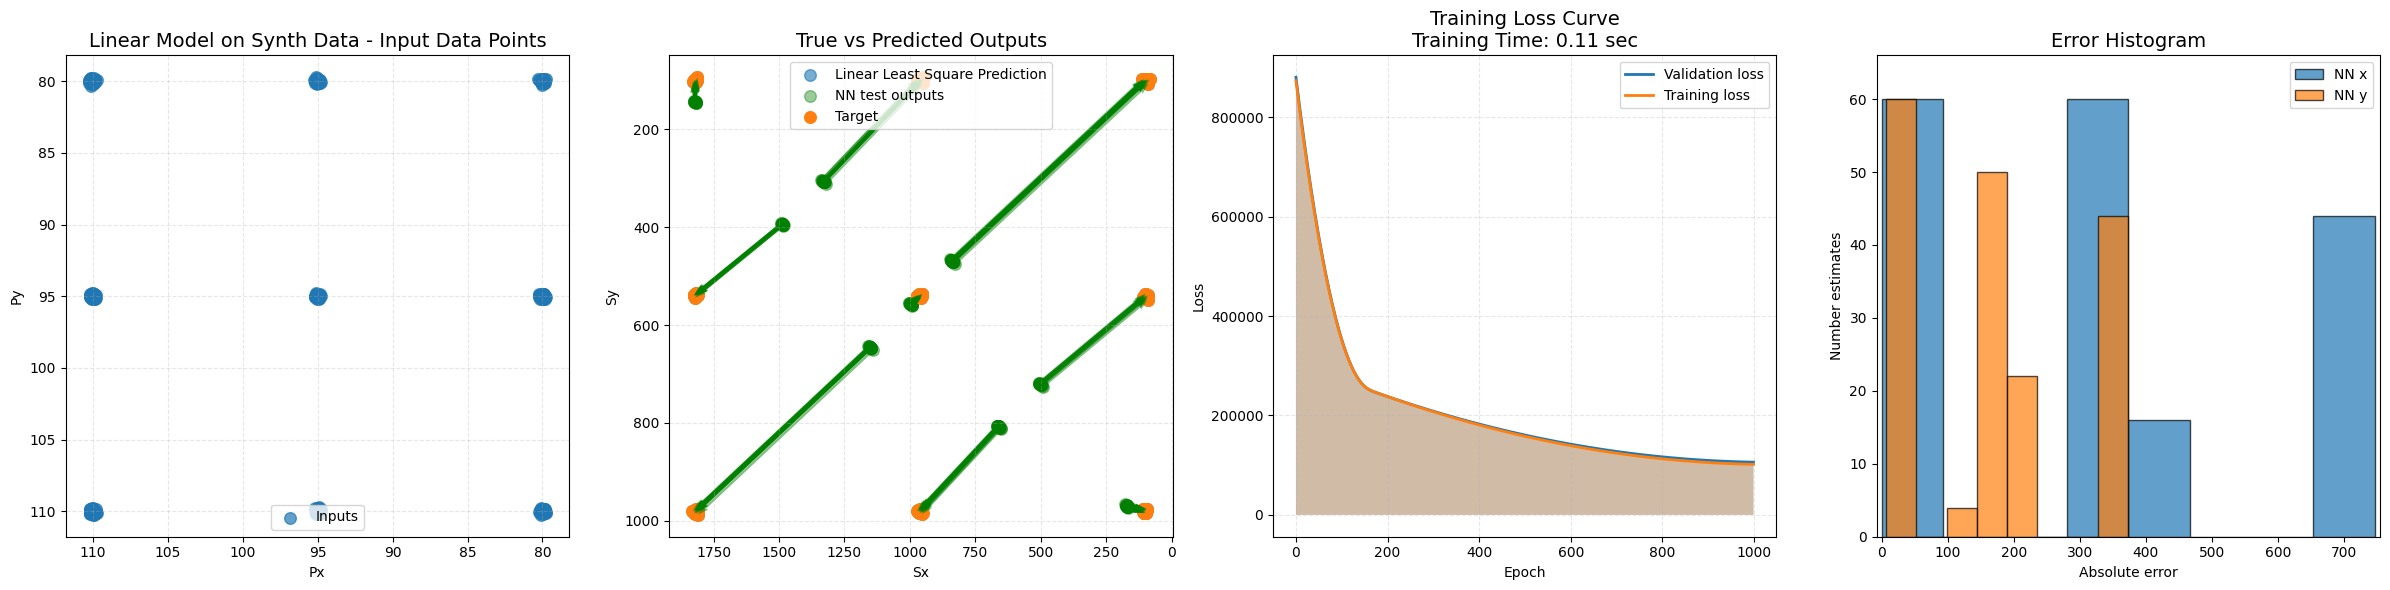

In [16]:
input_syn, target_syn, A, b = nn_util.generate_data_grid(noise_std=0.1)

X_train_syn, X_test_syn, Y_train_syn, Y_test_syn = train_test_split(input_syn, target_syn, test_size=0.2, random_state=42)
X_train_syn_val, X_val_syn, Y_train_syn_val, Y_val_syn = train_test_split(X_train_syn, Y_train_syn, test_size=0.25, random_state=42)

X_train_tensor_syn = torch.tensor(X_train_syn_val, dtype=torch.float32)
Y_train_tensor_syn = torch.tensor(Y_train_syn_val, dtype=torch.float32)
X_val_tensor_syn = torch.tensor(X_val_syn, dtype=torch.float32)
Y_val_tensor_syn = torch.tensor(Y_val_syn, dtype=torch.float32)
X_test_tensor_syn = torch.tensor(X_test_syn, dtype=torch.float32)
Y_test_tensor_syn = torch.tensor(Y_test_syn, dtype=torch.float32)

input_dim = X_train_tensor_syn.shape[1]
output_dim = Y_train_tensor_syn.shape[1]
learning_rate = 0.1
num_epochs = 1000

model = LinearModel(input_dim, output_dim)
criterion = MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
losses_syn, val_losses_syn, training_time_syn = train_model(
    model, criterion, optimizer, X_train_tensor_syn, Y_train_tensor_syn,
    X_val_tensor_syn, Y_val_tensor_syn, num_epochs=num_epochs
    )

mse, Y_pred, true_values, errors_nn = test_model(model, X_test_tensor_syn, Y_test_tensor_syn)
print(f'Average MSE: {mse}')

nn_util.plot_results(
    X_train_tensor_syn, Y_train_tensor_syn, X_test_tensor_syn, Y_test_tensor_syn,
    Y_pred, errors_nn, losses_syn, val_losses_syn,
    model_name='Linear Model on Synth Data', training_time=training_time_syn
    )

<article class="message task"><a class="anchor" id="prediction2"></a>
    <div class="message-header">
        <span>Task 9: Analyse results</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Consider the reasons why the neural network continues to perform poorly, even when working with synthetic (ideal) data.



</div></article>



In [0]:
# Task 9: Analyse results

# 1. **Overfitting on Training Data**:
#    - The neural network may overfit the training data due to its optimization process, leading to poor generalization.
#    - This overfitting could result in the observed high variance in predictions.

# 2. **Suboptimal Hyperparameters**:
#    - The chosen learning rate (0.1) might not be ideal, potentially leading to slow convergence or inability to
#      reach a global minimum.
#    - The number of epochs (1000) may also be insufficient for the model to properly learn the synthetic data.

# 3. **Limited Model Complexity**:
#    - A simple linear model (without hidden layers or non-linear activations) lacks the expressive power to capture
#      relationships in data effectively, even with synthetic inputs.

# 4. **Lack of Feature Normalization**:
#    - Inputs may not be normalized or scaled, which can lead to uneven weight updates during optimization.
#    - This lack of normalization can cause instability during gradient descent.

# 5. **Bias in Initialization**:
#    - Random initialization of weights may bias the model, requiring more epochs or adjustments to converge to an
#      effective solution.

# 6. **Gradient Descent Limitations**:
#    - Gradient clipping may prevent the model from making large updates, slowing down convergence unnecessarily.
#    - Stochastic Gradient Descent (SGD) might converge slowly for simpler problems without momentum or Adam optimizer.

# **Conclusion**:
# The poor performance of the neural network on synthetic data can be attributed to a combination of suboptimal
# hyperparameters, lack of model complexity, and insufficient preprocessing. Enhancing model architecture, using
# better optimization strategies, and tuning parameters could improve results significantly.

### Data wrangling
The following step investigate the impact of preprocessing of the data by normalizing the input and label data. It also investigates the impact of the learning rate and the number of iterations.
<article class="message is-info">
  <div class="message-header">Data structure for plotting</div>
  <div class="message-body">
  
  To investigate the performance of the models the function `plot_results_collected`
 from the file `nn_util.py`
 is used. This function takes six dictionaries as input:
- object of model instance:
- list of training losses
- list of validation losses
- Training time: float
- $N \times 2$ array of predictions on test data
- list of prediction errors

The data needed to populate these data structures were provided gradually througout the exercise. It is important to maintain the key names for the specific models. Define key names such as: `'Synthetic lr: 0.01, epoch: 500'`
 to indicate architecture and training parameters.

  
  </div>
</article>

<article class="message task"><a class="anchor" id="prediction100"></a>
    <div class="message-header">
        <span>Task 10: Train a linear model (normalized gaze data and synthetid gaze data)</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Complete the `DataScaler`
 class by implementing the `normalize`
 function and the `denormalize`
 function. 


$$
x_{\text{normalized}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

$$
x_{\text{denormalized}} = x_{\text{normalized}} \cdot (x_{\max} - x_{\min}) + x_{\min}
$$
2. Use `DataScaler`
to normalize the data in the `cleaned_pupil.csv`
 and `screen_coordinates.csv`
 files.
3. Use `DataScaler`
to normalize the synthetic data. 
4. In the nested for-loops:    - Train two models, one for each dataset using the `train_model`
 function.
    - Test the models using the `test_model`
 function.
    - For each model store results in the designated dictionaries:        - Model instance (`LinearModel`
)
        - Loss (training)
        - Loss (validation)
        - Training time
        - Predictions for test data 
        - Prediction errors 




5. Use the function `plot_results_collected`
 from the `nn_util.py`
 file, to visualize the result.



</div></article>



In [35]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import nn_util
import torch.nn as nn
import torch.optim as optim
import time

# Define the DataScaler class
class DataScaler:
    def __init__(self):
        self.min = None
        self.max = None

    def normalize(self, data):
        """Normalizes the data using min-max scaling."""
        return (data - self.min) / (self.max - self.min)

    def denormalize(self, normalized_data):
        """Denormalizes the data back to the original scale."""
        return normalized_data * (self.max - self.min) + self.min


# Load real gaze data
frames = nn_util.load_frames("data/frames.csv")
file_name_pupil = './data/cleaned_pupil_coordinates.csv'
file_name_screen = './data/cleaned_screen_coordinates.csv'
pupil_coor = np.asarray(nn_util.load_coordinates(file_name_pupil))
screen_coor = np.asarray(nn_util.load_coordinates(file_name_screen))

# Align the data by truncating the larger dataset
min_samples = min(pupil_coor.shape[0], screen_coor.shape[0])
pupil_coor = pupil_coor[:min_samples]
screen_coor = screen_coor[:min_samples]

# Normalize the data
real_scaler = DataScaler()
real_scaler.min = np.min(pupil_coor, axis=0)
real_scaler.max = np.max(pupil_coor, axis=0)
pupil_data_normalized = real_scaler.normalize(pupil_coor)
screen_data_normalized = real_scaler.normalize(screen_coor)

# Split real data into training, validation, and test sets
X_train, X_test, Y_train, Y_test = train_test_split(pupil_data_normalized, screen_data_normalized, test_size=0.2, random_state=42)
X_train_val, X_val, Y_train_val, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

# Generate synthetic data
data_grid = nn_util.generate_data_grid(noise_std=0.1)
input_syn, target_syn = data_grid[:2]
synthetic_scaler = DataScaler()
synthetic_scaler.min = np.min(input_syn.numpy(), axis=0)
synthetic_scaler.max = np.max(input_syn.numpy(), axis=0)
input_syn_normalized = synthetic_scaler.normalize(input_syn)
target_syn_normalized = synthetic_scaler.normalize(target_syn)

# Split synthetic data into training, validation, and test sets
X_train_syn, X_test_syn, Y_train_syn, Y_test_syn = train_test_split(input_syn_normalized, target_syn_normalized, test_size=0.2, random_state=42)
X_train_syn_val, X_val_syn, Y_train_syn_val, Y_val_syn = train_test_split(X_train_syn, Y_train_syn, test_size=0.25, random_state=42)


# Prepare for model training
input_dim = 2
output_dim = 2
learning_rates = [0.0001, 0.1, 1.5]
epochs = [500, 2000, 10000]
criterion = MSELoss()

# Initialize result containers
models_dict = {}
losses_dict = {}
losses_val_dict = {}
training_time_dict = {}
mse_dict = {}

# Train and test models for real and synthetic data
for lr in learning_rates:
    for ep in epochs:
        # Train on real data
        model_real = LinearModel(input_dim, output_dim)
        optimizer_real = optim.SGD(model_real.parameters(), lr=lr)
        losses_real, val_losses_real, training_time_real, _ = train_model(
            model_real, criterion, optimizer_real,
            torch.tensor(X_train_val, dtype=torch.float32),
            torch.tensor(Y_train_val, dtype=torch.float32),
            torch.tensor(X_val, dtype=torch.float32),
            torch.tensor(Y_val, dtype=torch.float32),
            num_epochs=ep
        )
        mse_real, predictions_real, errors_real = test_model(
            model_real,
            torch.tensor(X_test, dtype=torch.float32),
            torch.tensor(Y_test, dtype=torch.float32)
        )
        key = f"Real_lr_{lr}_epoch_{ep}"
        models_dict[key] = model_real
        losses_dict[key] = losses_real
        losses_val_dict[key] = val_losses_real
        training_time_dict[key] = training_time_real
        mse_dict[key] = mse_real

        # Train on synthetic data
        model_syn = LinearModel(input_dim, output_dim)
        optimizer_syn = optim.SGD(model_syn.parameters(), lr=lr)
        losses_syn, val_losses_syn, training_time_syn, _ = train_model(
            model_syn, criterion, optimizer_syn,
            torch.tensor(X_train_syn_val, dtype=torch.float32),
            torch.tensor(Y_train_syn_val, dtype=torch.float32),
            torch.tensor(X_val_syn, dtype=torch.float32),
            torch.tensor(Y_val_syn, dtype=torch.float32),
            num_epochs=ep
        )
        mse_syn, predictions_syn, errors_syn = test_model(
            model_syn,
            torch.tensor(X_test_syn, dtype=torch.float32),
            torch.tensor(Y_test_syn, dtype=torch.float32)
        )
        key_syn = f"Synthetic_lr_{lr}_epoch_{ep}"
        models_dict[key_syn] = model_syn
        losses_dict[key_syn] = losses_syn
        losses_val_dict[key_syn] = val_losses_syn
        training_time_dict[key_syn] = training_time_syn
        mse_dict[key_syn] = mse_syn


# Plot results
nn_util.plot_mse_bar(mse_dict)
# nn_util.plot_mse_bar(mse_norm_dict)
# nn_util.plot_mse_bar(mse_norm_syn_dict)

Dictionary loaded from data/frames.csv


ValueError: not enough values to unpack (expected 4, got 3)

<article class="message task"><a class="anchor" id="prediction3"></a>
    <div class="message-header">
        <span>Task 11: Reflection on results</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Experiment with the hyperparameter settings in the `learning_rate`
 and number of `epoch`
 lists.
2. What are the benefits and cost of training with larger/smaller learning rate? Reflect on the effect of changing the learning rate.
3. Reflect on the effect of the loss and training time when changing the number of epochs. 
4. What is the relationship between learning rate and epochs? 



</div></article>



In [0]:
# Write your reflections here...

### Influence of noise
The following steps investigate the effect of noise on the model performance. The files `cleaned_pupils.csv`
 and `cleaned_screen_coordinates.csv`
 in the `data`
 folder, contains cleaned pupil coordinates and their corresponding labels.
<article class="message task"><a class="anchor" id="prediction4"></a>
    <div class="message-header">
        <span>Task 12: Load data (cleaned gaze data)</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to load the data.



</div></article>



In [0]:
cleaned_input = nn_util.load_from_csv('data/cleaned_pupils.csv')
cleaned_label = nn_util.load_from_csv('data/cleaned_screen_coordinates.csv')

<article class="message task"><a class="anchor" id="cleaned"></a>
    <div class="message-header">
        <span>Task 13: Train a linear model on cleaned gaze data</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Copy the code from the previous task into the cell below and use the data `cleaned_input`
 and `cleaned_label`
. The cell should:
    - Normalize the data. 
    - Train the models:        - Create two nested for-loops to iterate the lists containing values for `learning rate`
 and `epochs`
. On each iteration the loops should:            - Train the model on the data, using the `train_model`
 function.
            - Test the model using the `test_model`
 function.
            - Save the following information in the designated dictionaries with the suffix `cleaned`
:                - Model 
                - Loss (training)
                - Loss (validation)
                - Training time 
                - Predictions
                - Errors 






    - Use the function `plot_results_collected`
 from the `nn_util.py`
 file to visualize the result.


2. Save the best performing model and the corresponding values specified in the data structure for plotting box into the dictionaries with the suffix `arc`
. These will later be used to compare with other architectures.




</div></article>



In [0]:
# Set hyperparameters
input_dim = 2
output_dim = 2
learning_rate = [0.1]
epoch = [2000]
criterion = MSELoss()


models_dict_arc = {}
losses_dict_arc = {}
losses_val_dict_arc = {}
training_time_dict_arc = {}
pred_norm_arc = {}
errors_norm_arc = {}
mse_arc = {}

models_dict_cleaned = {}
losses_dict_cleaned = {}
losses_val_dict_cleaned = {}
training_time_dict_cleaned = {}
pred_norm_cl = {}
errors_norm_cl = {}



for i in learning_rate:
    for j in epoch:

<article class="message task"><a class="anchor" id="prediction5"></a>
    <div class="message-header">
        <span>Task 14: Reflections on model performance</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Given that 39/796 coordinates in the `cleaned`
 dataset were removed as outliers, reflect on the how the type of outliers influence model performance by comparing the model trained on the uncleaned normalized dataset in task [Task 10](#prediction100) to the model in task [Task 13](#cleaned). Include the following points in your discussion:    - Why do only 39 points significantly affect the model’s performance?
    - How does the division of training and test data influence the model’s performance?
    - What methods could be used to perform an in-depth analysis of such data splits?





</div></article>



In [0]:
#Write your reflections here...

## Non-linear Model
The following steps are about two different architectures for non-linear models. Compare the non-linear models to the affine model as done above. 
<article class="message task"><a class="anchor" id="prediction6"></a>
    <div class="message-header">
        <span>Task 15: Analyse architecture</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Examine the cell below to get an overview of the two neural architectures and identify the main differences between the models.



</div></article>



In [0]:
class NNRelu(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(NNRelu, self).__init__()
        self.linear1 = nn.Linear(input_dim, output_dim)
        self.relu = nn.ReLU()
 
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        return x
 
class NNRelu_exp(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NNRelu_exp, self).__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(hidden_dim, output_dim)
 
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.linear2(x)
        x = self.relu2(x)
        x = self.linear3(x)
        return x

In [0]:
# Write your reflections here...

<article class="message task"><a class="anchor" id="prediction7"></a>
    <div class="message-header">
        <span>Task 16: Train non-linear models (cleaned gaze data)</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


**Note:** For the exam it may be convenient to copy the code from above to the cell below as you complete the steps. 

1. Rerun task [Task 10](#prediction100) using the normalized, cleaned data, on the two new models. The steps were:

- Train the models:
    - Create two nested for-loops looping the lists containing values for `learning rate`
 and `epochs`
. The loops should:        - Train models of both architectures on the cleaned normalized data, using the `train_model`
 function.
        - Test the models using the `test_model`
 function.
        - Save the following information in the designated dictionaries with the suffix `arc`
, for each model:            - Model 
            - Loss (training)
            - Loss (validation)
            - Training time 
            - Predictions
            - Errors 






- Use the function `plot_results_collected`
 from the `nn_util.py`
 file, to visualize the result.

- Use the function `plot_mse_bar`
 from the `nn_util.py`
 file, to visualize the mean squared error compared.




</div></article>



In [0]:
# Set hyperparameters
input_dim = 2
output_dim = 2
learning_rate = [0.001, 0.1, 1.5]
epoch = [500, 2000, 10000]
hidden_layer = 10

criterion = MSELoss()




for i in learning_rate:
    for j in epoch:

<article class="message task"><a class="anchor" id="prediction8"></a>
    <div class="message-header">
        <span>Task 17: Reflect on the results</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Do more/less complex models improve the result? Why/why not?
2. Are there indications of overfitting in any of the models?



</div></article>



In [0]:
# Write your reflections here...

<article class="message task"><a class="anchor" id="prediction9"></a>
    <div class="message-header">
        <span>Task 18: Analyse results</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Experiment with other architectures by suggesting models with different number layers and neurons in each layer.
**Note:** This part of the exercise can easily become a timesink, mind your time as you proceed.


2. Reflect on the results    - Do more/less complex models improve the result? Why/why not?
    - Do any of the models show signs of overfitting?





</div></article>



In [0]:
# Write your reflections here...

## Own dataset
You are now encouraged to experiment with your own dataset and other models. 
**Note:** For the exam it may be convenient to copy your code from task [Task 10](#prediction100) to the cell below.
This part of the exercise can easily become a timesink, mind your time as you proceed.

<article class="message task"><a class="anchor" id="prediction10"></a>
    <div class="message-header">
        <span>Task 19: Train models (own dataset)</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Experiment with your own cleaned dataset from the exercise Filtering gaze data
. 
2. Reflect on your results, compare to the results of `test_subject_3`
. 



</div></article>



In [0]:
# Write your reflections here...